# Assignment 3 Task 4-A*

Importing the required files (including problem class file and algorithm files).
They are in the same directory as the solution template file.

In [1]:
from graphProblem import *
from search_algorithms import *
from search_algorithms_for_graph import *

This is all the coordinate for country in South East Asia (SEA)

In [2]:
SEA_node = [
    ['Cambodia', (12.57, 104.99)],
    ['Laos', (19.86, 102.5)],
    ['Myanmar', (21.91, 95.96)],
    ['Thailand', (15.87, 100.99)],
    ['Vietnam', (14.06, 108.28)],
    ['Brunei', (4.54, 114.73)],
    ['Philippines', (12.88, 121.77)],
    ['Indonesia', (0, 113.92)],
    ['Malaysia', (4.21, 101.98)],
    ['Singapore', (1.35, 103.82)],
    ['Timor-Leste', (-8.87, 125.73)],
]

Links between nodes or neighbour relationships. It is a list of lists. 
It shows flight time taken fron a city to another city

In [3]:
SEA_flight_neighbour = [
    ['Cambodia',[['Indonesia',280],['Laos',80],['Myanmar',115],
                 ['Thailand',65],['Vietnam',45],['Philippines',400],
                 ['Malaysia',110],['Singapore',105]]],
    ['Laos',[['Indonesia',360],['Thailand',65],['Vietnam',60],['Malaysia',170]]],
    ['Myanmar',[['Indonesia',355],['Thailand',85],['Vietnam',125],['Brunei',240],
                ['Philippines',405],['Malaysia',150],['Singapore',175]]],
    ['Thailand',[['Indonesia',205],['Vietnam',90],['Brunei',165],
                 ['Philippines',210],['Malaysia',210],['Singapore',145]]],
    ['Vietnam',[['Indonesia',375],['Brunei',140],['Philippines',150],['Singapore',140]]],
    ['Brunei',[['Philippines',125],['Malaysia',85],['Singapore',130]]],
    ['Philippines',[['Indonesia',235],['Malaysia',225],['Singapore',225]]],
    ['Malaysia',[['Indonesia',110],['Singapore',55],['Timor-Leste',255]]],
    ['Singapore',[['Indonesia',110]]],
    ['Timor-Leste',[['Indonesia',345]]]
]

Define a state space graph as an undirected graph for the search problem using the Method `define_graph(neighbour, location, use_romania)`.

This method returns two values: the first value is used for a visual display, and the another is used to solve the problem and save the graph.

In [4]:
SEA_graph_data, SEA_graph = define_graph(SEA_flight_neighbour, SEA_node, True)

Use a method show_graph() to display a virtual map. This method is defined in notebook.py.

The graph may look rotated due world coordinate some city start with minus coordinate

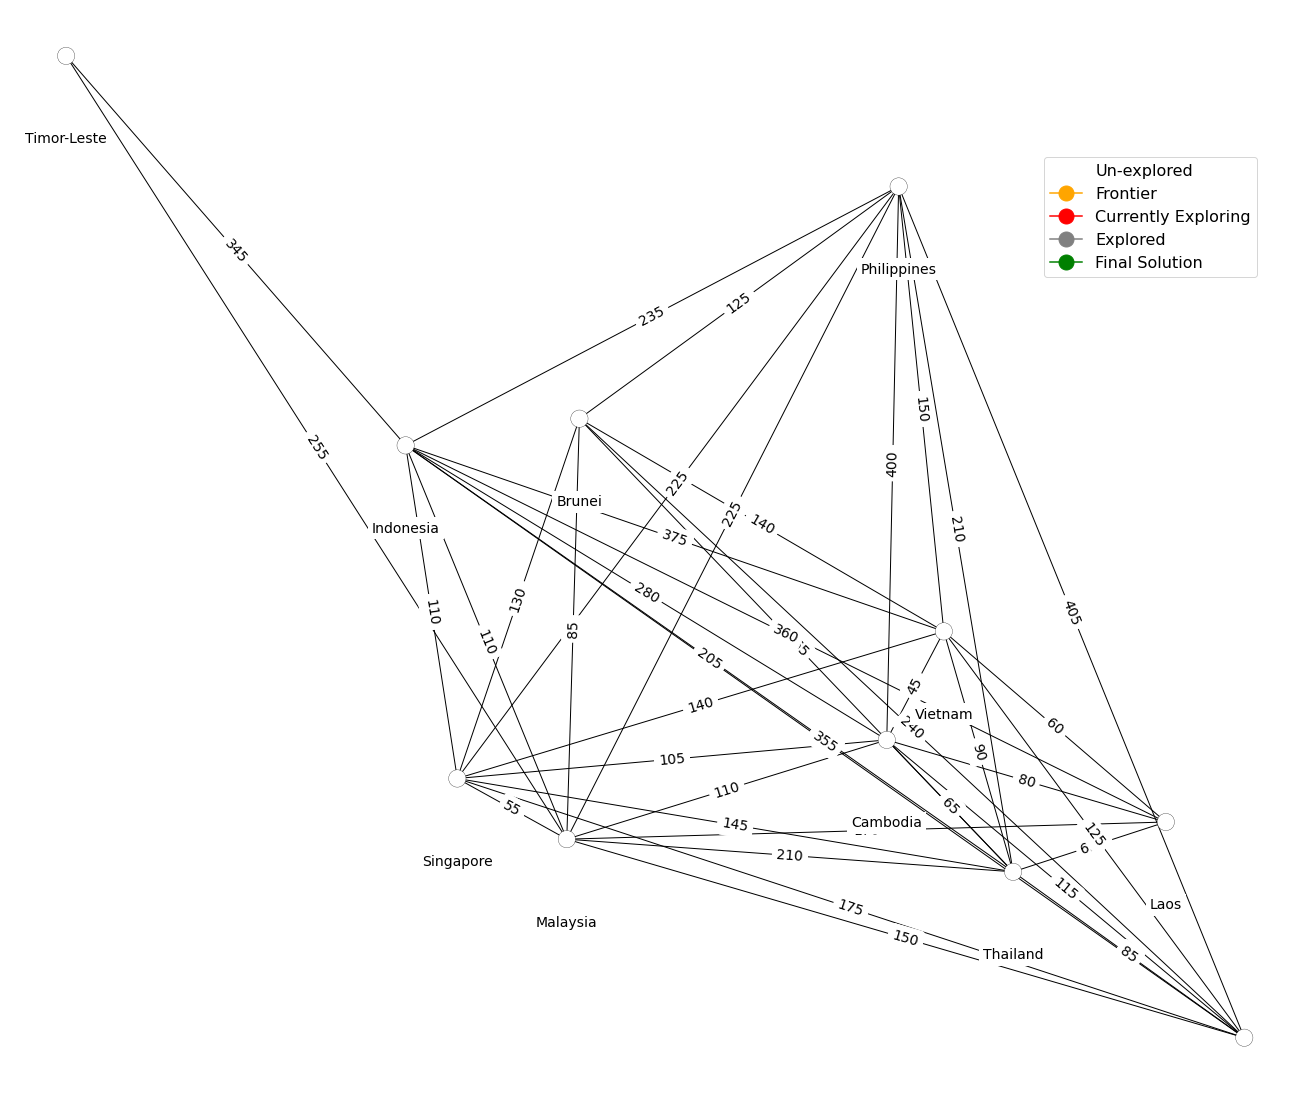

In [5]:
show_graph(SEA_graph_data)

Define the search problem by specifying the state space graph and the initial node and goal node.


First arguments will be start node

Second arguments will be goal node

Third arguments is the graph used

In [6]:
SEA_problem = GraphProblem('Singapore','Myanmar',SEA_graph)

### Define heuristic function h first. h is the euclidean_distance between two nodes (From Helen)

In [7]:
def distance(a, b):
    """The distance between two (x, y) points."""
    xA, yA = a
    xB, yB = b
    return np.hypot((xA - xB), (yA - yB))
    #return np.sqrt((xA - xB)**2+(yA - yB)**2)

In [8]:
def heuristic_fun(x):
    locs = getattr(SEA_problem.graph, 'locations', None)
    if locs:
        if type(SEA_problem) is str:
            return int(distance(locs[x], locs[SEA_problem.goal]))

        return int(distance(locs[x.state], locs[SEA_problem.goal]))
    else:
        return np.inf

In [9]:
def euclidean_distance(x, y):
    return np.sqrt(sum((_x - _y) ** 2 for _x, _y in zip(x, y)))

In [10]:
def heuristic_fun_euclidean(x):
    locs = getattr(SEA_problem.graph, 'locations', None)
    if locs:
        if type(SEA_problem) is str:
            return int(euclidean_distance(locs[x], locs[SEA_problem.goal]))

        return int(euclidean_distance(locs[x.state], locs[SEA_problem.goal]))
    else:
        return np.inf

Invoke the algorithm A* SEARCH ( **Name: AStar** ) to solve the search problem by calling the display() method and passing the search problem and the search algorithm used. This display() method displays the solution as a list of cities.

In [11]:
def manhattan_distance(x, y):
    return sum(abs(_x - _y) for _x, _y in zip(x, y))

In [12]:
def hamming_distance(x, y):
    return sum(_x != _y for _x, _y in zip(x, y))

In [13]:
def heuristic_fun_manhattan(x):
    locs = getattr(romania_problem.graph, 'locations', None)
    if locs:
        if type(romania_problem) is str:
            return int(manhattan_distance(locs[x], locs[romania_problem.goal]))

        return int(manhattan_distance(locs[x.state], locs[romania_problem.goal]))
    else:
        return np.inf

In [14]:
def heuristic_fun_hamming(x):
    locs = getattr(SEA_problem.graph, 'locations', None)
    if locs:
        if type(SEA_problem) is str:
            return int(hamming_distance(locs[x], locs[SEA_problem.goal]))

        return int(hamming_distance(locs[x.state], locs[SEA_problem.goal]))
    else:
        return np.inf

Code to search using A* algorithm

In [15]:
display(SEA_problem, AStar(heuristic_fun_euclidean))
display_for_graph(SEA_problem,AStar_for_graph(),SEA_graph_data)

Algorithm: AStar
 Iteration times : 29  Path : [<Node Singapore>, <Node Myanmar>]
Algorithm: AStar_for_graph


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…